# Sentiment Analysis (CV-TF_IDF-HASH) 

### Import necessary libraries

In [2]:
# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

# text preprocessing
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import gensim
import re


import unicodedata
tokenizer = ToktokTokenizer()
#nlp = spacy.load("en_core_web_sm")

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

c:\users\owner\appdata\local\programs\python\python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

### Reading the Cleaned Dataset

In [4]:
# Read the file
df = pd.read_csv('1429_1.csv')

In [5]:
# Sample observations
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [7]:
# Drop unnecessary columns
df2 = df[['reviews.rating','reviews.text']]

In [8]:
df2.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34627 non-null  float64
 1   reviews.text    34659 non-null  object 
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


There is some missing values in both columns, the number is so small compared to the 34,000 examples in the dataset so we can remove them.

In [10]:
df2.dropna(inplace = True)

In [11]:
df2.rename(columns = {'reviews.rating' : 'rating', 'reviews.text' : 'text'}, inplace = True)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34626 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  34626 non-null  float64
 1   text    34626 non-null  object 
dtypes: float64(1), object(1)
memory usage: 811.5+ KB


# Natural Language Processing

## 1. Feature Engineering and Selection

Machine Learning models take numerical values as input. Our dataset is a list of sentences, so in order for our algorithm to extract patterns from the data, we first need to find a way to represent it in a way that our algorithm can understand, i.e. as a list of numbers.

We will implement CounterVectorizer, TF-IDF, Hash Vectorizer, Word2Vec, adding most common words into the stopwords list, SMOTE, PCA, and Truncated SVD techniques into our models in the following sections as a part of feature engineering and selection.

## 2. Data Preprocessing

### Cleaning the text

1- Removing stop words first.

In [13]:
stop = stopwords.words('english')
df2['text'] = df2['text'].apply(lambda x: ' '.join([word for word in str(x).lower().split() if word not in (stop)]))

In [14]:
df2.head()

,rating,text
0,5.0,product far disappointed. children love use li...
1,5.0,great beginner experienced person. bought gift...
2,5.0,"inexpensive tablet use learn on, step nabi. th..."
3,4.0,i've fire hd 8 two weeks love it. tablet great...
4,5.0,"bought grand daughter comes visit. set user, e..."


2- Lemmatization

In [15]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df2['text'] = df2.text.apply(lemmatize_text)
df2['text'] = df2.text.apply(lambda x: ' '.join(x))

In [16]:
df2.head()

,rating,text
0,5.0,product far disappointed. child love use like ...
1,5.0,great beginner experienced person. bought gift...
2,5.0,"inexpensive tablet use learn on, step nabi. th..."
3,4.0,i've fire hd 8 two week love it. tablet great ...
4,5.0,"bought grand daughter come visit. set user, en..."


Now our text is clean and ready to be used.

### Separating Response Variable and Feature

We will consider ratings 4 and 5 to be positive and 1, 2, and 3 to be negative

In [17]:
df2['class'] = df2['rating'].apply(lambda x: 0 if x < 4 else 1)

In [18]:
# Splitting the Data Set into Train and Test Sets
X = df2['text']
y = df2['class']

In [19]:
df2['class'].value_counts()

1    32315
0     2311
Name: class, dtype: int64

### Splitting Dataset into Train and Test Set

We split our data in to a training set used to fit our model and a test set to see how well it generalizes to unseen data.

In [20]:
# Splitting Dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [21]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(25969,)
Test Set Shape		:(8657,)


## 3. Selecting the Right Evaluation Metric

It is clear that our dataset is imbalanced, so we need to pay more attention to the smaller class (negative rating). I will choose the f1 score as it combines both precision and recall.

### Confusion Matrix Plot Function

Understanding the types of errors our model makes, and least desirable are important . A good way to visualize that information is using a Confusion Matrix, which compares the predictions our model makes with the true label. With that in mind, we used confusion matrix besides our evaluation metric (f1 score).

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [23]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

## 4. Modelling

This is a supervised binary classification problem. We are trying to predict the sentiment based on the reviews left by customers who bought headphones products in Amazon e-commerce online platform. We used Python’s Scikit Learn libraries to solve the problem. In this context, we implemented Logistic Regression, Random Forest, Naive Bayes, XGBOOST, and Catboost algorithms. Besides that, I implemented deep learning technique with Keras.

Since the ratings of the reviews were not distributed normally, I decided to decrease rating classes from 5 to 2 by merging Rating 1-2 as ‘Bad’ and Rating 3-4-5 as 'Good'.

For feature selection, I applied threshold for word occurence with using min_df/max_df, PCA and Singular Value Decomposition.

For feature engineering, I applied CountVectorizer, TF-IDF, Hashing Vectorizer and Word2Vec to the text data in order to turn a collection of text documents into numerical feature vectors.

## 4.1 CountVectorizer Bag of Words

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

"CountVectorizer" implements both tokenization and occurrence counting in a single class.

In [24]:
# Create the word vector with CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [25]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 11773


In [26]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [27]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vect_train, columns = vocab).head()

,00,000,000s,01,04,05,06,0ghz,0ne,10,...,zinio,zip,zippy,zombies,zone,zones,zoo,zoom,zooming,zwave
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creating a function for applying different algorithms

In [28]:

def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

### Dummy Classifier

In [46]:
y_test.value_counts()

1    8063
0     594
Name: class, dtype: int64

In [47]:
clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

f1 score: 0.873323181542738


In [48]:
# Compute and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.07      0.07      0.07       594
           1       0.93      0.93      0.93      8063

    accuracy                           0.87      8657
   macro avg       0.50      0.50      0.50      8657
weighted avg       0.87      0.87      0.87      8657



### 4.1.1 Logistic Regression with CountVectorizer

In [50]:
# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling(LogisticRegression(class_weight = 'balanced', c = 0.1))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.8962172837390062


#### Classification Report

In [51]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

           0       0.31      0.61      0.41       594
           1       0.97      0.90      0.93      8063

    accuracy                           0.88      8657
   macro avg       0.64      0.75      0.67      8657
weighted avg       0.92      0.88      0.90      8657



#### Confusion Matrix

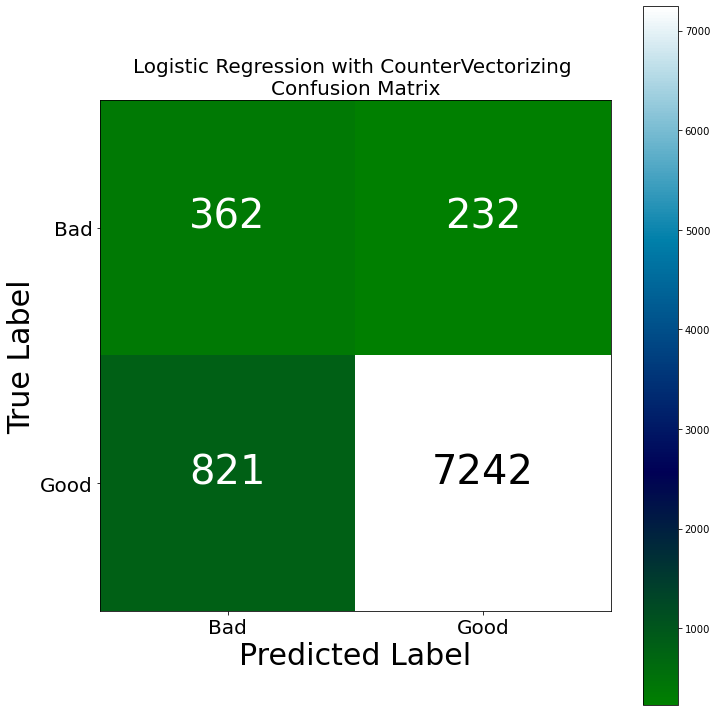

In [53]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

### 4.1.2 Random Forest with CountVectorizer¶

In [57]:
# Call the modeling function for random forest classifier with countvectorizer and print f1 score
modeling(RandomForestClassifier(class_weight = 'balanced', n_estimators = 100, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

f1 score: 0.9014343884519902


#### Classification Report

In [58]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       0.62      0.02      0.04       594
           1       0.93      1.00      0.96      8063

    accuracy                           0.93      8657
   macro avg       0.78      0.51      0.50      8657
weighted avg       0.91      0.93      0.90      8657



#### Confusion Matrix

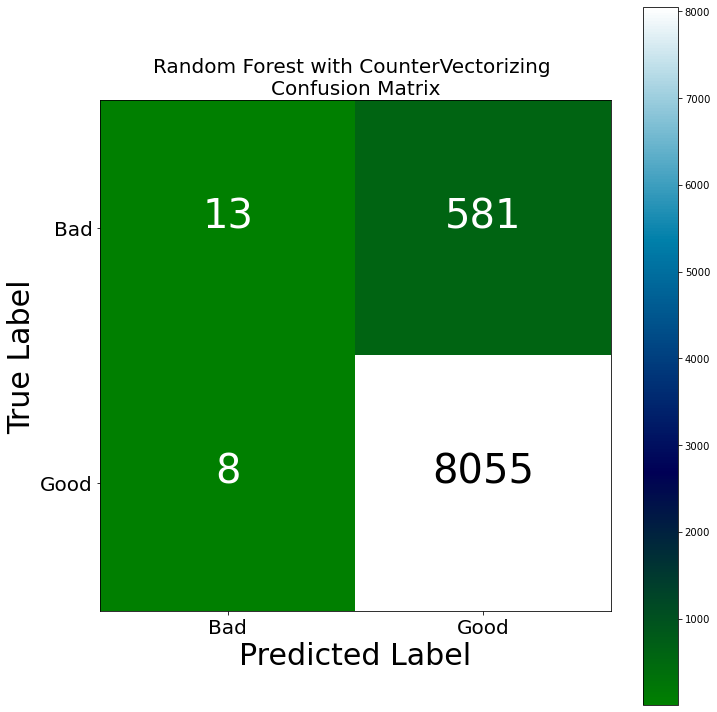

In [59]:
# Print confusion matrix for random forest classifier with countVectorizer
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")

### 4.1.3 Naive Bayes with CountVectorizer

In [60]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
modeling(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

f1 score: 0.9245113899469843


#### Classification Report

In [61]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_nb))

              precision    recall  f1-score   support

           0       0.56      0.27      0.36       594
           1       0.95      0.98      0.97      8063

    accuracy                           0.94      8657
   macro avg       0.75      0.63      0.66      8657
weighted avg       0.92      0.94      0.92      8657



#### Confusion Matrix

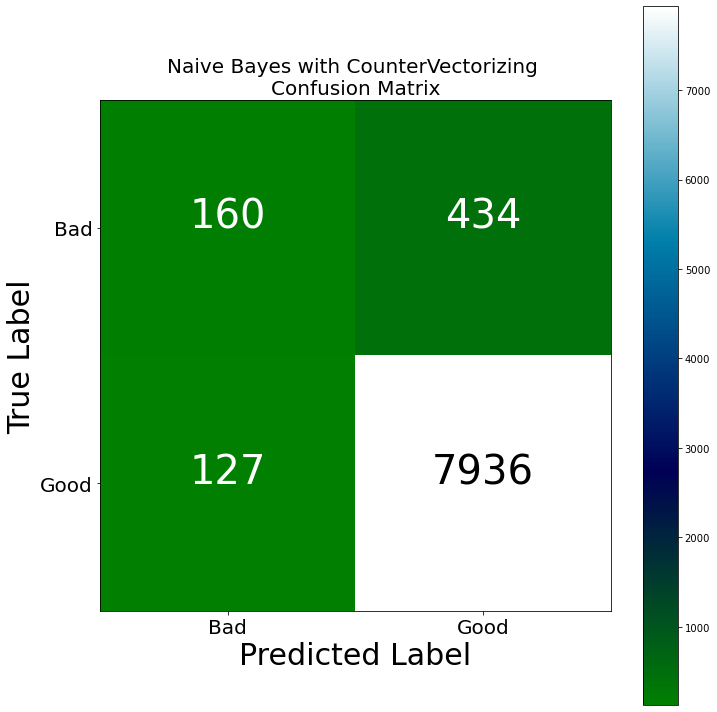

In [62]:
# Print confusion matrix for naive bayes with countVectorizer
disp_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

### 4.1.4 XGBoost with CountVectorizer

In [63]:
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(XGBClassifier())

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

[10:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score: 0.9218018733563752


#### Classification Report

In [64]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_xgb))

              precision    recall  f1-score   support

           0       0.62      0.21      0.31       594
           1       0.94      0.99      0.97      8063

    accuracy                           0.94      8657
   macro avg       0.78      0.60      0.64      8657
weighted avg       0.92      0.94      0.92      8657



#### Confusion Matrix

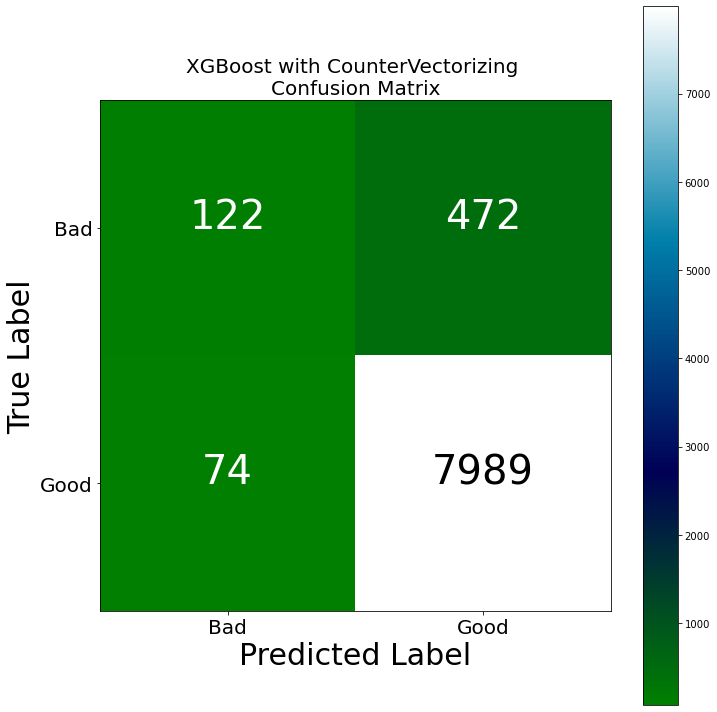

In [65]:
# Print confusion matrix for gradient boosting with countVectorizer
disp_confusion_matrix(y_pred_cv_xgb, "XGBoost")

### 4.1.5 CatBoost with CountVectorizer

In [66]:
# Call the modeling function for CatBoost with countvectorizer and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, 
                            depth=2, loss_function='Logloss'))

# Assign y_pred to a variable for further process
y_pred_cv_catboost = y_pred

0:	learn: 0.2544125	total: 2.06s	remaining: 3m 23s
1:	learn: 0.2328321	total: 2.12s	remaining: 1m 43s
2:	learn: 0.2263302	total: 2.17s	remaining: 1m 10s
3:	learn: 0.2198419	total: 2.35s	remaining: 56.4s
4:	learn: 0.2113002	total: 2.44s	remaining: 46.4s
5:	learn: 0.2089023	total: 2.76s	remaining: 43.2s
6:	learn: 0.2040841	total: 2.85s	remaining: 37.9s
7:	learn: 0.2025534	total: 2.93s	remaining: 33.7s
8:	learn: 0.2014072	total: 3.02s	remaining: 30.6s
9:	learn: 0.2003764	total: 3.11s	remaining: 28s
10:	learn: 0.1991134	total: 3.17s	remaining: 25.7s
11:	learn: 0.1982859	total: 3.23s	remaining: 23.6s
12:	learn: 0.1972040	total: 3.28s	remaining: 22s
13:	learn: 0.1963752	total: 3.33s	remaining: 20.5s
14:	learn: 0.1945655	total: 3.38s	remaining: 19.2s
15:	learn: 0.1936347	total: 3.44s	remaining: 18s
16:	learn: 0.1927792	total: 3.48s	remaining: 17s
17:	learn: 0.1919513	total: 3.54s	remaining: 16.1s
18:	learn: 0.1914928	total: 3.6s	remaining: 15.3s
19:	learn: 0.1910189	total: 3.65s	remaining: 14

#### Classification Report

In [67]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_catboost))

              precision    recall  f1-score   support

           0       0.56      0.17      0.26       594
           1       0.94      0.99      0.97      8063

    accuracy                           0.93      8657
   macro avg       0.75      0.58      0.61      8657
weighted avg       0.92      0.93      0.92      8657



#### Confusion Matrix

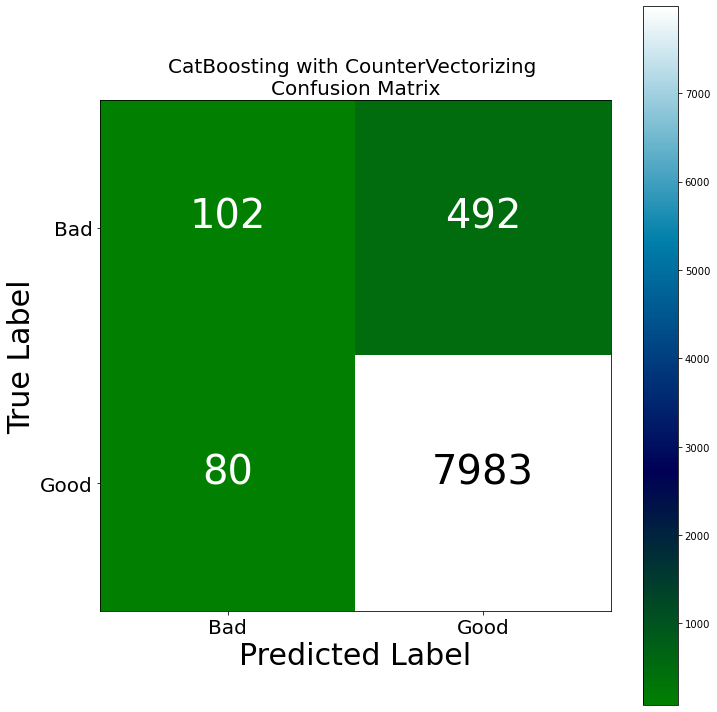

In [68]:
# Print confusion matrix for CatBoost with countVectorizer
disp_confusion_matrix(y_pred_cv_catboost, "CatBoosting")

### 4.1.6 Comparison of Models with CountVectorizer

In [46]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [47]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

### Function for f1 Score Plotting

In [48]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

### Algorithms Comparison with CountVectorizer

In [72]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf, y_pred_cv_nb, y_pred_cv_xgb, y_pred_cv_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [73]:
df_tv2

precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.878364 bad       0.306002  0.609428  0.407428   
                                  good      0.968959  0.898177  0.932226   
                                  average   0.923470  0.878364  0.896217   
           Random Forest 0.931963 bad       0.619048  0.021886  0.042276   
                                  good      0.932723  0.999008  0.964728   
                                  average   0.911201  0.931963  0.901434   
           Naive Bayes   0.935197 bad       0.557491  0.269360  0.363224   
                                  good      0.948148  0.984249  0.965861   
                                  average   0.921343  0.935197  0.924511   
           XGBoost       0.936930 bad       0.622449  0.205387  0.308861   
                                  good      0.944215  0.990822  0.966957   
                                  average   0.922137  0.936930  0.921802   
           CatBoost      0.933926 bad       0.560440  0.171717  0.262887   
                                  good      0.941947  0.990078  0.965413   
                                  average   0.915770  0.933926  0.917209   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.878364 bad        594.0  
                                  good      8063.0  
                                  average   8657.0  
           Random Forest 0.931963 bad        594.0  
                                  good      8063.0  
                                  average   8657.0  
           Naive Bayes   0.935197 bad        594.0  
                                  good      8063.0  
                                  average   8657.0  
           XGBoost       0.936930 bad        594.0  
                                  good      8063.0  
                                  average   8657.0  
           CatBoost      0.933926 bad        594.0  
                                  good      8063.0  
                                  average   8657.0

### Average f1 Score - Models with CountVectorizer

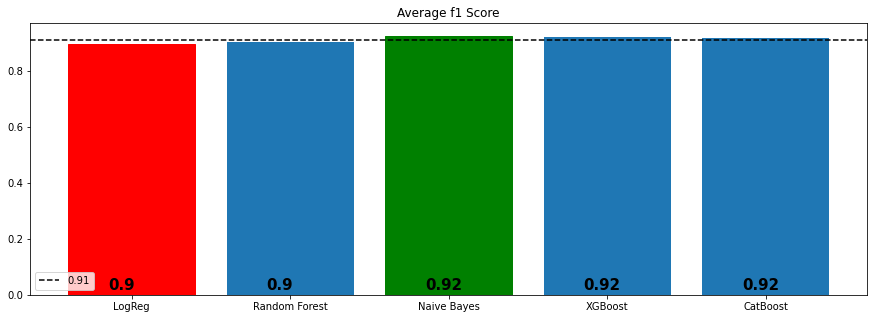

In [74]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

## 4.2 TF-IDF

In order to help our model focus more on meaningful words, we can use a TF-IDF score (Term Frequency, Inverse Document Frequency) on top of our Bag of Words model. TF-IDF weighs words by how rare they are in our dataset, discounting words that are too frequent and just add to the noise.

In [29]:
# Create the word vector with TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

### 4.2.1 Logistic Regression with TF-IDF

In [30]:

# Call the modeling function for logistic regression with TF-IDF and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred

f1 score: 0.8655658843694869


#### Classification Report

In [31]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_logreg))

              precision    recall  f1-score   support

           0       0.25      0.76      0.37       580
           1       0.98      0.83      0.90      8077

    accuracy                           0.83      8657
   macro avg       0.61      0.80      0.64      8657
weighted avg       0.93      0.83      0.87      8657



#### Confusion Matrix

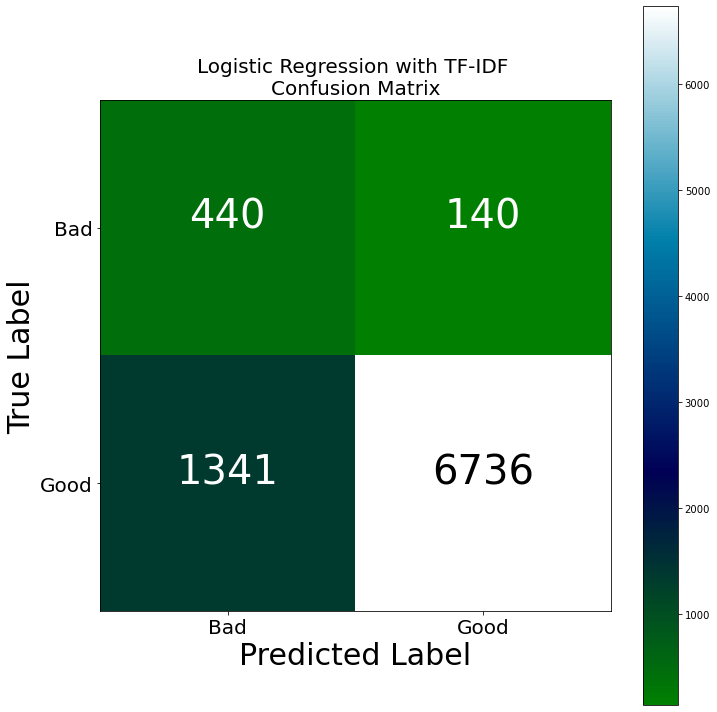

In [32]:
# Print confusion matrix for logistic regression with TF-IDF
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "TF-IDF")

### 4.2.2 Random Forest with TF-IDF

In [33]:
# Call the modeling function for random forest classifier with TF-IDF and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42, class_weight = 'balanced'), 
         tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_rf = y_pred

f1 score: 0.9043723593388383


#### Classification Report

In [34]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_rf))

              precision    recall  f1-score   support

           0       0.52      0.03      0.06       580
           1       0.93      1.00      0.97      8077

    accuracy                           0.93      8657
   macro avg       0.72      0.51      0.51      8657
weighted avg       0.91      0.93      0.90      8657



#### Confusion Matrix

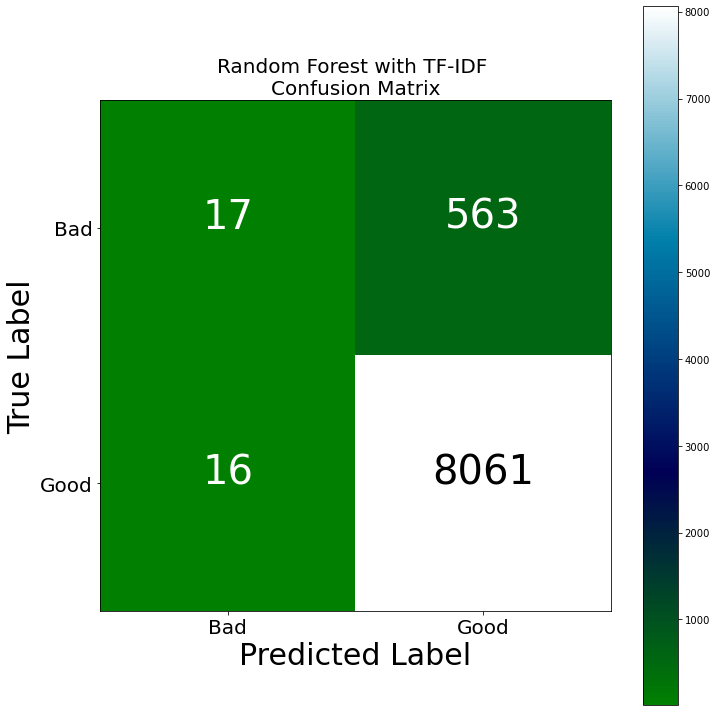

In [35]:
# Print confusion matrix for random forest classifier with TF-IDF
disp_confusion_matrix(y_pred_tfidf_rf, "Random Forest", "TF-IDF")

### 4.2.3 Naive Bayes with TF-IDF

In [36]:
# Call the modeling function for naive bayes with TF-IDF and print f1 score
modeling(MultinomialNB(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_nb = y_pred

f1 score: 0.9008907308378515


#### Classification Report

In [37]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_nb))

              precision    recall  f1-score   support

           0       0.50      0.00      0.00       580
           1       0.93      1.00      0.97      8077

    accuracy                           0.93      8657
   macro avg       0.72      0.50      0.48      8657
weighted avg       0.90      0.93      0.90      8657



#### Confusion Matrix

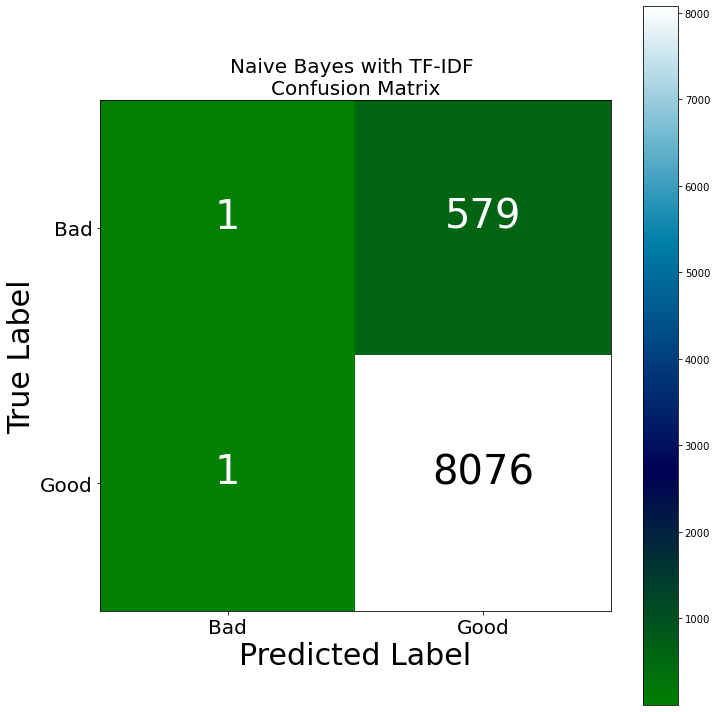

In [38]:
# Print confusion matrix for naive bayes with TF-IDF
disp_confusion_matrix(y_pred_tfidf_nb, "Naive Bayes", "TF-IDF")

### 4.2.4 XGBoost with TF-IDF

In [39]:
# Call the modeling function for XGBoost with TF-IDF and print f1 score
modeling(XGBClassifier(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_xgb = y_pred

[23:24:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score: 0.9223000509436261


#### Classification Report

In [40]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_xgb))

              precision    recall  f1-score   support

           0       0.69      0.18      0.28       580
           1       0.94      0.99      0.97      8077

    accuracy                           0.94      8657
   macro avg       0.82      0.59      0.62      8657
weighted avg       0.93      0.94      0.92      8657



#### Confusion Matrix

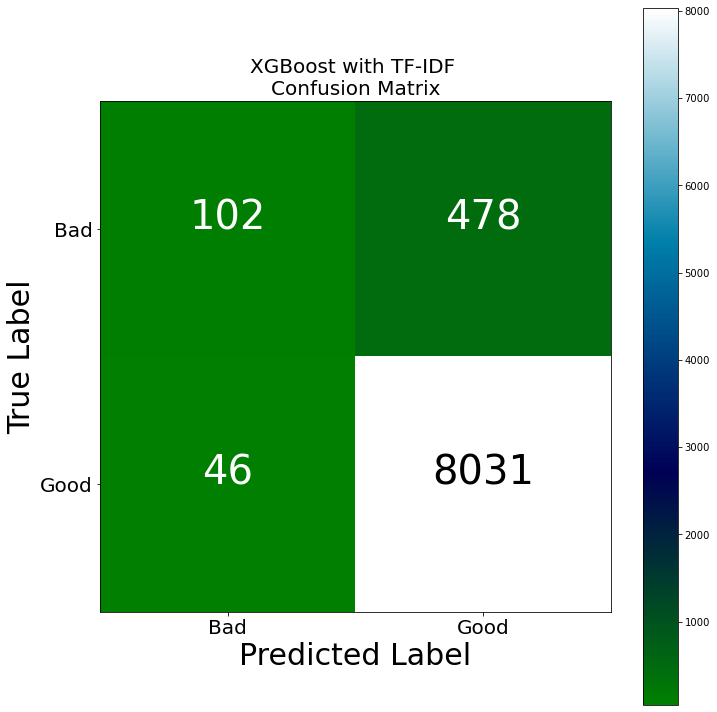

In [41]:
# Print confusion matrix for XGBoost with TF-IDF
disp_confusion_matrix(y_pred_tfidf_xgb, "XGBoost", "TF-IDF")

### 4.2.5 Catboost with TF-IDF

In [42]:
# Call the modeling function for Catboost with TF-IDF and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_catboost = y_pred

0:	learn: 0.2558815	total: 313ms	remaining: 31s
1:	learn: 0.2340312	total: 438ms	remaining: 21.5s
2:	learn: 0.2266705	total: 562ms	remaining: 18.2s
3:	learn: 0.2171048	total: 634ms	remaining: 15.2s
4:	learn: 0.2116825	total: 697ms	remaining: 13.2s
5:	learn: 0.2073987	total: 749ms	remaining: 11.7s
6:	learn: 0.2050557	total: 821ms	remaining: 10.9s
7:	learn: 0.2037839	total: 879ms	remaining: 10.1s
8:	learn: 0.2023071	total: 931ms	remaining: 9.41s
9:	learn: 0.2008969	total: 1.01s	remaining: 9.07s
10:	learn: 0.1998160	total: 1.07s	remaining: 8.68s
11:	learn: 0.1983941	total: 1.14s	remaining: 8.34s
12:	learn: 0.1974395	total: 1.21s	remaining: 8.12s
13:	learn: 0.1964139	total: 1.28s	remaining: 7.86s
14:	learn: 0.1956160	total: 1.34s	remaining: 7.58s
15:	learn: 0.1944307	total: 1.41s	remaining: 7.39s
16:	learn: 0.1935271	total: 1.47s	remaining: 7.19s
17:	learn: 0.1923255	total: 1.54s	remaining: 7.01s
18:	learn: 0.1916570	total: 1.62s	remaining: 6.89s
19:	learn: 0.1907720	total: 1.69s	remaining

#### Classification Report

In [43]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_catboost))

              precision    recall  f1-score   support

           0       0.54      0.19      0.28       580
           1       0.94      0.99      0.97      8077

    accuracy                           0.93      8657
   macro avg       0.74      0.59      0.63      8657
weighted avg       0.92      0.93      0.92      8657



#### Confusion Matrix

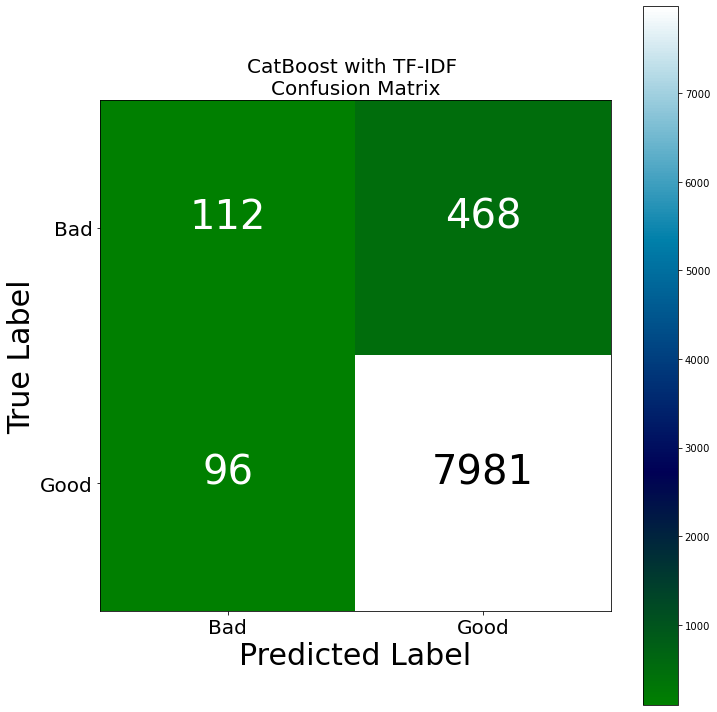

In [44]:
# Print confusion matrix for CatBoost with TF-IDF
disp_confusion_matrix(y_pred_tfidf_catboost, "CatBoost", "TF-IDF")

### 4.2.6 Comparision of Models with TF-IDF Vectorizer

In [49]:
comparison_table(y_preds = [y_pred_tfidf_logreg, y_pred_tfidf_rf, y_pred_tfidf_nb, y_pred_tfidf_xgb, y_pred_tfidf_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

#### Comparison Table - TF-IDF Vectorizing

In [50]:
# Print the comparision matrix
print('\nComparision Matrix of Models with TF-IDF Vectorizer\n')
df_tv2


Comparision Matrix of Models with TF-IDF Vectorizer



precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.828925 bad       0.247052  0.758621  0.372723   
                                  good      0.979639  0.833973  0.900956   
                                  average   0.930558  0.828925  0.865566   
           Random Forest 0.933118 bad       0.515152  0.029310  0.055465   
                                  good      0.934717  0.998019  0.965331   
                                  average   0.906607  0.933118  0.904372   
           Naive Bayes   0.933002 bad       0.500000  0.001724  0.003436   
                                  good      0.933102  0.999876  0.965336   
                                  average   0.904085  0.933002  0.900891   
           XGBoost       0.939471 bad       0.689189  0.175862  0.280220   
                                  good      0.943824  0.994305  0.968407   
                                  average   0.926764  0.939471  0.922300   
           CatBoost      0.934850 bad       0.538462  0.193103  0.284264   
                                  good      0.944609  0.988114  0.965872   
                                  average   0.917398  0.934850  0.920206   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.828925 bad        580.0  
                                  good      8077.0  
                                  average   8657.0  
           Random Forest 0.933118 bad        580.0  
                                  good      8077.0  
                                  average   8657.0  
           Naive Bayes   0.933002 bad        580.0  
                                  good      8077.0  
                                  average   8657.0  
           XGBoost       0.939471 bad        580.0  
                                  good      8077.0  
                                  average   8657.0  
           CatBoost      0.934850 bad        580.0  
                                  good      8077.0  
                                  average   8657.0

#### Average f1 score - Models with TF-IDF Vectorizer

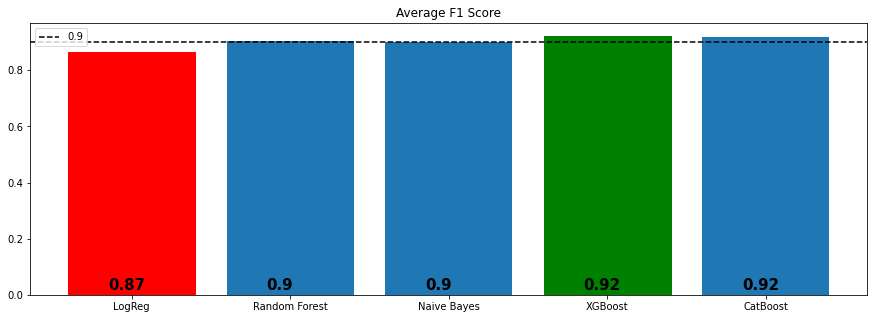

In [51]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")

## 4.3 Hashing Vectorizer

Hash Vectorizer is designed to be as memory efficient as possible. Instead of storing the tokens as strings, the vectorizer applies the hashing trick to encode them as numerical indexes. The downside of this method is that once vectorized, the features’ names can no longer be retrieved.

In [53]:
# Create the word vector with Hash Vectorizer
hash_vect = HashingVectorizer(n_features=2000, ngram_range=(1,1))
hash_vect_train = hash_vect.fit_transform(X_train)
hash_vect_train = hash_vect_train.toarray()
hash_vect_test = hash_vect.transform(X_test)
hash_vect_test = hash_vect_test.toarray()

## 4.3.1 Logistic Regression with Hash Vectorizer

In [54]:
# Call the modeling function for logistic regression with Hash Vectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_logreg = y_pred

f1 score: 0.8407385761746154


#### Classification Report

In [55]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_logreg))

              precision    recall  f1-score   support

           0       0.21      0.74      0.32       580
           1       0.98      0.80      0.88      8077

    accuracy                           0.79      8657
   macro avg       0.59      0.77      0.60      8657
weighted avg       0.93      0.79      0.84      8657



#### Confusion Matrix

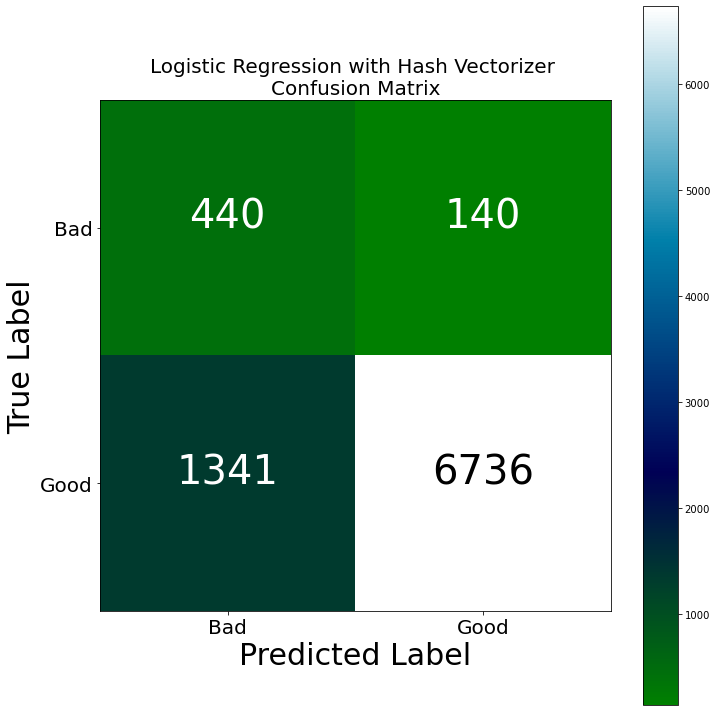

In [56]:
# Print confusion matrix for logistic regression with Hash Vectorizer
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "Hash Vectorizer")

## 4.3.2 Random Forest with Hash Vectorizer

In [57]:
# Call the modeling function for random forest classifier with Hash Vectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_rf = y_pred

f1 score: 0.9094049034829691


#### Classification Report

In [58]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_rf))

              precision    recall  f1-score   support

           0       0.58      0.07      0.12       580
           1       0.94      1.00      0.97      8077

    accuracy                           0.93      8657
   macro avg       0.76      0.53      0.54      8657
weighted avg       0.91      0.93      0.91      8657



#### Confusion Matrix

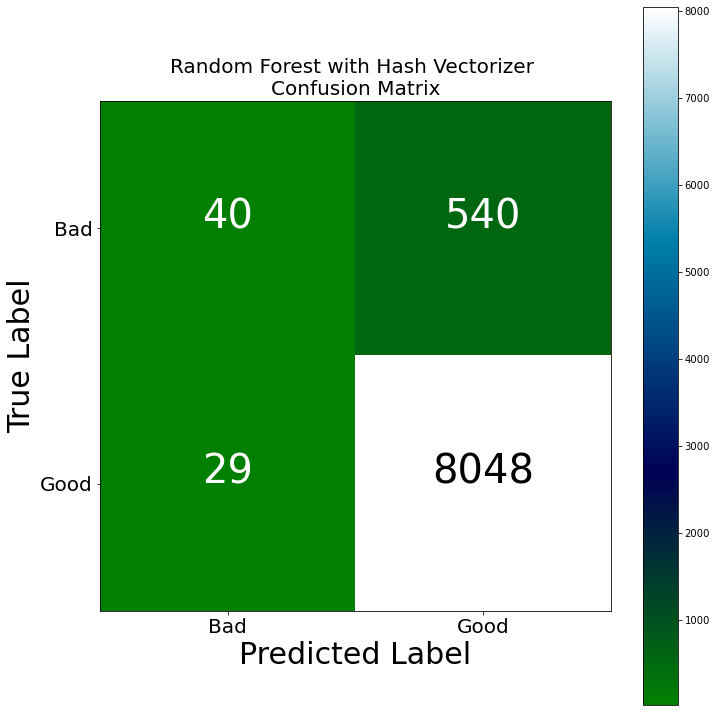

In [59]:
# Print confusion matrix for random forest classifier with Hash Vectorizer
disp_confusion_matrix(y_pred_hash_rf, "Random Forest", "Hash Vectorizer")

## 4.3.3 XGBoost with Hash Vectorize

In [67]:
# Call the modeling function for XGBoost with Hash Vectorizer and print f1 score
modeling(XGBClassifier(), hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_xgb = y_pred

[00:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score: 0.9197701527301603


#### Classification Report

In [68]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_xgb))

              precision    recall  f1-score   support

           0       0.65      0.16      0.25       580
           1       0.94      0.99      0.97      8077

    accuracy                           0.94      8657
   macro avg       0.80      0.58      0.61      8657
weighted avg       0.92      0.94      0.92      8657



#### Confusion Matrix

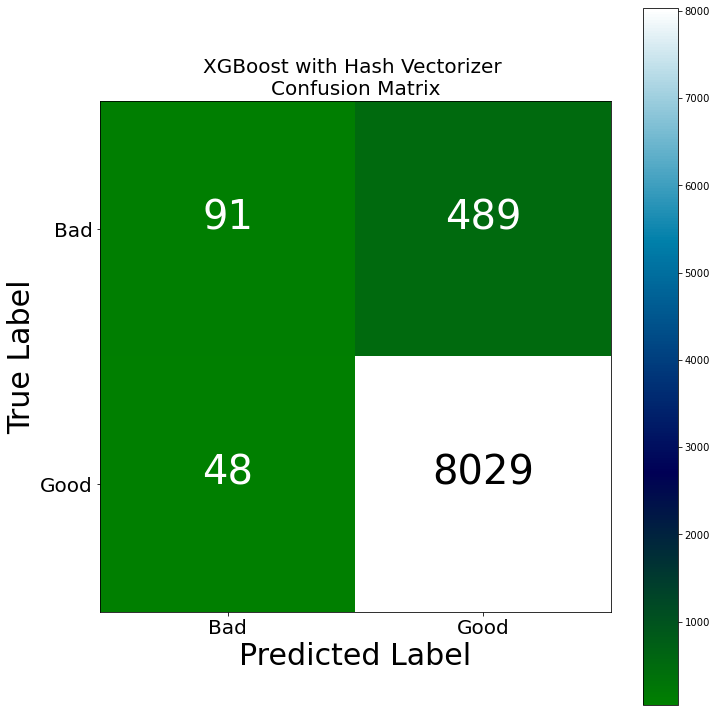

In [69]:
# Print confusion matrix for XGBoost with Hash Vectorizer
disp_confusion_matrix(y_pred_hash_xgb, "XGBoost", "Hash Vectorizer")

## 4.3.4 CatBoost with Hash Vectorizer

In [70]:
# Call the modeling function for Catboost with Hash Vectorizer and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_catboost = y_pred

0:	learn: 0.2558503	total: 55.7ms	remaining: 5.51s
1:	learn: 0.2345938	total: 110ms	remaining: 5.41s
2:	learn: 0.2271269	total: 180ms	remaining: 5.83s
3:	learn: 0.2169339	total: 234ms	remaining: 5.6s
4:	learn: 0.2115391	total: 291ms	remaining: 5.53s
5:	learn: 0.2069367	total: 369ms	remaining: 5.78s
6:	learn: 0.2048703	total: 435ms	remaining: 5.77s
7:	learn: 0.2035569	total: 497ms	remaining: 5.72s
8:	learn: 0.2019282	total: 554ms	remaining: 5.6s
9:	learn: 0.2002475	total: 606ms	remaining: 5.46s
10:	learn: 0.1993393	total: 663ms	remaining: 5.36s
11:	learn: 0.1980271	total: 714ms	remaining: 5.23s
12:	learn: 0.1971415	total: 769ms	remaining: 5.15s
13:	learn: 0.1961608	total: 826ms	remaining: 5.08s
14:	learn: 0.1950996	total: 874ms	remaining: 4.95s
15:	learn: 0.1940505	total: 930ms	remaining: 4.88s
16:	learn: 0.1932309	total: 986ms	remaining: 4.81s
17:	learn: 0.1924264	total: 1.04s	remaining: 4.72s
18:	learn: 0.1907632	total: 1.1s	remaining: 4.71s
19:	learn: 0.1900883	total: 1.16s	remaining

#### Classification Report

In [71]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_catboost))

              precision    recall  f1-score   support

           0       0.50      0.17      0.25       580
           1       0.94      0.99      0.96      8077

    accuracy                           0.93      8657
   macro avg       0.72      0.58      0.61      8657
weighted avg       0.91      0.93      0.92      8657



#### Confusion Matrix

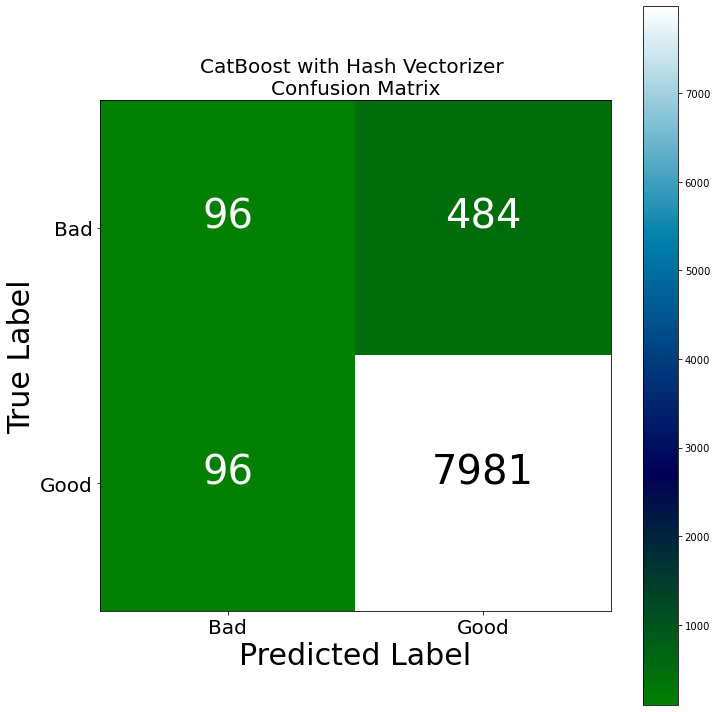

In [72]:
# Print confusion matrix for CatBoost with Hash Vectorizer
disp_confusion_matrix(y_pred_hash_catboost, "CatBoost", "Hash Vectorizer")

## 4.3.6 Comparison of Models with Hash Vectorizer

In [73]:
comparison_table(y_preds = [y_pred_hash_logreg, y_pred_hash_rf, y_pred_hash_xgb, y_pred_hash_catboost], 
                labels = ['LogReg', 'Random Forest', 'XGBoost', 'CatBoost'])

#### Comparison Table

In [74]:
# Print the comparision matrix
print('\nComparision Matrix of Models with Hash Vectorizer\n')
df_tv2


Comparision Matrix of Models with Hash Vectorizer



precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.793115 bad       0.207063  0.737931  0.323385   
                                  good      0.976935  0.797078  0.877889   
                                  average   0.925355  0.793115  0.840739   
           Random Forest 0.934273 bad       0.579710  0.068966  0.123267   
                                  good      0.937122  0.996410  0.965857   
                                  average   0.913176  0.934273  0.909405   
           XGBoost       0.937969 bad       0.654676  0.156897  0.253129   
                                  good      0.942592  0.994057  0.967641   
                                  average   0.923302  0.937969  0.919770   
           CatBoost      0.933002 bad       0.500000  0.165517  0.248705   
                                  good      0.942823  0.988114  0.964938   
                                  average   0.913155  0.933002  0.916952   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.793115 bad        580.0  
                                  good      8077.0  
                                  average   8657.0  
           Random Forest 0.934273 bad        580.0  
                                  good      8077.0  
                                  average   8657.0  
           XGBoost       0.937969 bad        580.0  
                                  good      8077.0  
                                  average   8657.0  
           CatBoost      0.933002 bad        580.0  
                                  good      8077.0  
                                  average   8657.0

#### Average f1 score - Hash Vectorizer

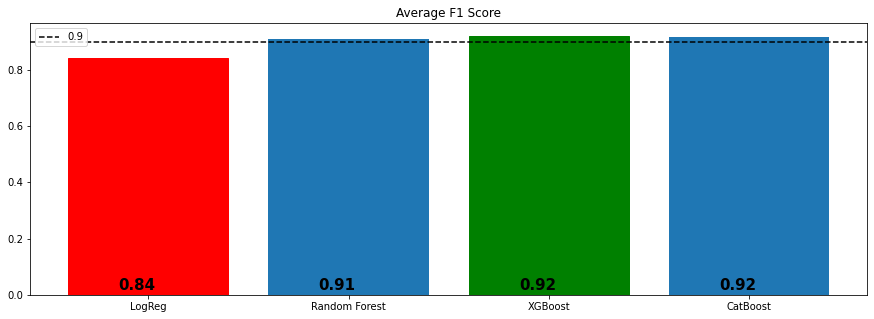

In [75]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")